In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
from pathlib import Path

In [2]:
ROOT_DIR = os.path.dirname(
os.path.dirname(str(Path(os.path.abspath('')).absolute())))

# Load Model

In [3]:
TARGET_NAME = "sim_time/"
ENCODING_NAME = "atomic/"
MODEL_NAME = "random_forest_model.pkl"

In [4]:
MODELS_DIR = os.path.join(
    str(Path(os.path.abspath('')).parent.parent.absolute()), "models", TARGET_NAME, ENCODING_NAME
)

In [5]:
with open(MODELS_DIR + MODEL_NAME, 'rb') as file:
    model = pickle.load(file)

# Load Data Sets

In [6]:
X_TRAIN_NAME = "X_train.csv"
y_TRAIN_NAME = "y_train.csv"

In [7]:
X_train = pd.read_csv(os.path.join(MODELS_DIR, "datasets", X_TRAIN_NAME), index_col=0)
y_train = pd.read_csv(os.path.join(MODELS_DIR, "datasets", y_TRAIN_NAME), index_col=0)

In [8]:
X_TEST_NAME = "X_Structure gen..csv"
y_TEST_NAME = "y_Structure gen..csv"

In [9]:
X_test = pd.read_csv(MODELS_DIR + "/datasets/" + X_TEST_NAME, index_col=0)
y_test = pd.read_csv(MODELS_DIR + "/datasets/" + y_TEST_NAME, index_col=0)

In [10]:
X_test.describe()

,ecutrho,k_density,ecutwfc,Ag,Al,Ar,As,Au,B,Ba,...,Tl,Tm,V,W,Xe,Y,Yb,Zn,Zr,total_atoms
count,53523.000000,53523.000000,53523.000000,53523.000000,53523.000000,53523.0,53523.000000,53523.000000,53523.000000,53523.000000,...,53523.000000,53523.000000,53523.000000,53523.000000,53523.0,53523.000000,53523.000000,53523.000000,53523.000000,53523.000000
mean,243.974740,5.918540,56.609121,0.029483,0.015423,0.0,0.005773,0.024438,0.005876,0.018002,...,0.017899,0.004456,0.030286,0.011986,0.0,0.017908,0.007305,0.043561,0.006166,2.047269
std,89.496891,2.826699,23.835315,0.117781,0.086452,0.0,0.053417,0.107806,0.053884,0.093150,...,0.092894,0.046991,0.119273,0.076480,0.0,0.092917,0.059994,0.141008,0.055180,0.303819
min,100.000000,2.000000,20.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
25%,180.000000,4.000000,35.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
50%,260.000000,6.000000,55.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
75%,340.000000,8.000000,75.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000
max,380.000000,10.000000,100.000000,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,4.000000


In [11]:
pred_trees = np.array([estimator.predict(X_train) for estimator in model.estimators_]).T

In [12]:
y_pred = model.predict(X_train)

In [13]:
np.allclose(np.mean(pred_trees, axis=1), y_pred)

True

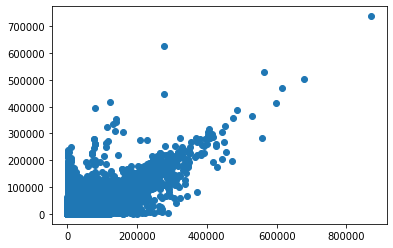

In [14]:
x = np.std(pred_trees, axis=1)
y = np.abs(y_pred - y_train.values.squeeze())
plt.scatter(x, y)